Loading the best model and test data...
Model and data loaded successfully.
Model Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Predictions generated on the test set.


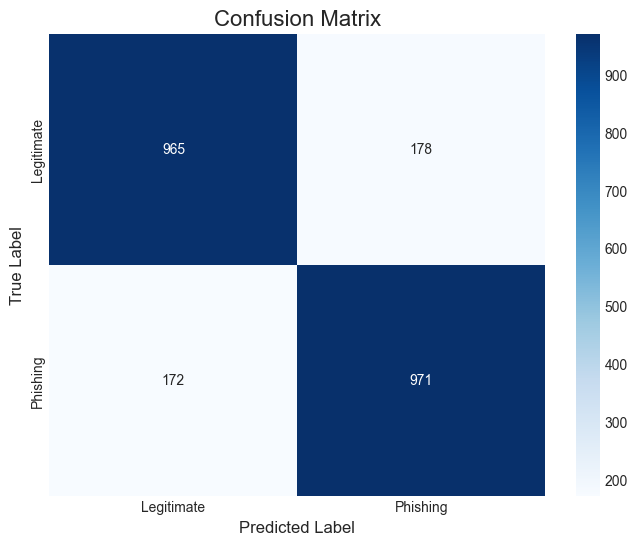


Interpreting the Confusion Matrix:
- True Negatives (Top-Left): 965 URLs correctly identified as Legitimate.
- False Positives (Top-Right): 178 Legitimate URLs incorrectly flagged as Phishing.
- False Negatives (Bottom-Left): 172 Phishing URLs incorrectly identified as Legitimate (Most dangerous error).
- True Positives (Bottom-Right): 971 URLs correctly identified as Phishing.

--- Feature Importance Analysis ---


C:\Users\Komal\AppData\Local\Temp\ipykernel_23468\615702082.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


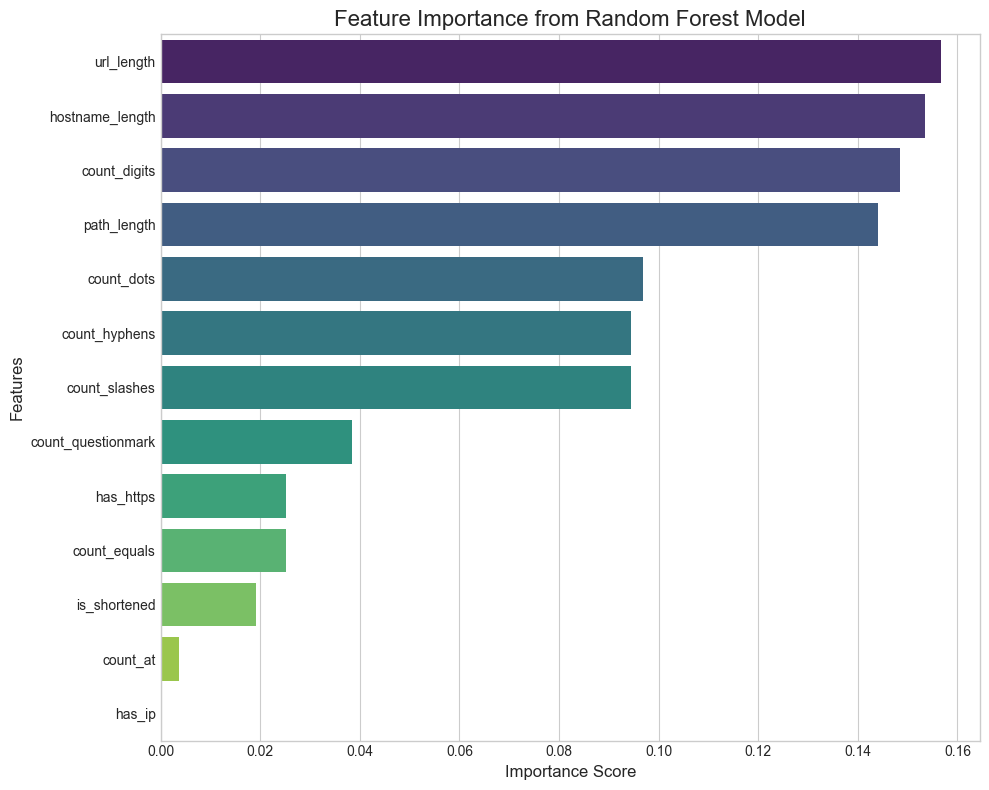


Top 5 Most Important Features:
           feature  importance
0       url_length    0.156687
1  hostname_length    0.153487
9     count_digits    0.148521
2      path_length    0.143981
4       count_dots    0.096921


In [1]:
# AI-Powered Phishing URL Detector
# Notebook 4: Results Visualization

# ## 4.1 Import Libraries
import pandas as pd
import numpy as np
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# ## 4.2 Load Model and Test Data
# Load the best performing model and the test data.

models_path = '../models/'
processed_data_path = '../data/processed/'
model_filepath = os.path.join(models_path, 'best_model.pkl')

try:
    print("Loading the best model and test data...")
    with open(model_filepath, 'rb') as f:
        best_model = pickle.load(f)
    
    X_test = pd.read_csv(os.path.join(processed_data_path, 'X_test.csv'))
    y_test = np.load(os.path.join(processed_data_path, 'y_test.npy'))
    
    print("Model and data loaded successfully.")
    print(f"Model Type: {type(best_model)}")
    
except FileNotFoundError:
    print("Error: Model or data files not found. Please run Notebook 2 and 3 first.")
    best_model, X_test, y_test = [None]*3


# ## 4.3 Generate Predictions
# Use the loaded model to make predictions on the test set.

if best_model is not None:
    y_pred = best_model.predict(X_test)
    print("\nPredictions generated on the test set.")


# ## 4.4 Visualize Results

if 'y_pred' in locals():
    # ### 4.4.1 Confusion Matrix
    # A confusion matrix gives a detailed breakdown of correct and incorrect classifications.
    
    cm = confusion_matrix(y_test, y_pred)
    class_labels = ['Legitimate', 'Phishing']
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.show()

    print("\nInterpreting the Confusion Matrix:")
    print(f"- True Negatives (Top-Left): {cm[0, 0]} URLs correctly identified as Legitimate.")
    print(f"- False Positives (Top-Right): {cm[0, 1]} Legitimate URLs incorrectly flagged as Phishing.")
    print(f"- False Negatives (Bottom-Left): {cm[1, 0]} Phishing URLs incorrectly identified as Legitimate (Most dangerous error).")
    print(f"- True Positives (Bottom-Right): {cm[1, 1]} URLs correctly identified as Phishing.")


    # ### 4.4.2 Feature Importance
    # Since our best model is a Random Forest, we can see which features it found most important.
    
    if isinstance(best_model, RandomForestClassifier):
        print("\n--- Feature Importance Analysis ---")
        
        importances = best_model.feature_importances_
        feature_names = X_test.columns
        
        # Create a dataframe for visualization
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 8))
        sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
        plt.title('Feature Importance from Random Forest Model', fontsize=16)
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Features', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        print("\nTop 5 Most Important Features:")
        print(feature_importance_df.head())
    else:
        print("\nFeature importance is typically extracted from tree-based models like Random Forest.")


# ## 4.5 Project Conclusion
#
# This notebook concludes our project. We have successfully:
# 1. Sourced and explored a real-world phishing URL dataset.
# 2. Engineered a custom set of predictive features from raw URLs.
# 3. Trained and evaluated multiple machine learning models.
# 4. Identified the Random Forest classifier as the best-performing model.
# 5. Visualized the model's performance with a confusion matrix and analyzed which features were most impactful.
#
# The project is now complete, with a trained model saved in the `models/` directory that can be used for future predictions.
